 # **Steps**
    
   **Clustering with K-Means**:
Use K-Means clustering to group countries based on their economic and health-related features. This will help identify clusters of countries with similar characteristics.\
Before applying K-Means, may want to normalize or scale the features to ensure that they have similar ranges.\
Determine the optimal number of clusters (K) using techniques like the elbow method or silhouette score.\
Assign each country to a cluster and analyze the characteristics of each cluster.

   **Principal Component Analysis (PCA)**:
PCA can be used to reduce the dimensionality of your dataset while preserving as much information as possible.\
Perform PCA on the features (child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp) to create a set of principal components.\
Can then use these components for visualization or clustering.\
PCA can help identify which features contribute the most to the variance in the data.

   **Classification with XGBoost**:
Can use the XGBoost algorithm for classification tasks, such as predicting the continent based on the given features.\
Split dataset into a training set and a test set.\
Encode the "continent" column into numerical labels.\
Train an XGBoost classifier on the training data.\
Evaluate the model's accuracy, precision, recall, F1-score, and confusion matrix on the test data.\
Fine-tune the model's hyperparameters for better performance.

   **Regression with XGBoost**:
If specific target variable in mind (e.g., predicting gdpp or child_mort), can use XGBoost for regression.\
Split dataset into a training set and a test set.\
Define target variable (e.g., gdpp or child_mort) and predictor variables.\
Train an XGBoost regression model on the training data.\
Evaluate the model's performance using regression metrics like mean absolute error (MAE), mean squared error (MSE), and R-squared on the test data.\
Fine-tune the model's hyperparameters for better predictive performance.

   **Visualization**:
Use various data visualization techniques (e.g., scatter plots, heatmaps, bar charts) to explore and present findings.\
Visualize the clusters obtained from K-Means or the results of PCA.\
Create visualizations to understand the relationship between features and the target variable.

   **Interpretation**:
Interpret the results of clustering to understand the groupings of countries based on their economic and health characteristics.\
For classification and regression tasks, interpret feature importances obtained from XGBoost to understand which features are most influential in predicting the target variable.

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from statsmodels.graphics.gofplots import qqplot

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, silhouette_score

import warnings
warnings.filterwarnings("ignore")

# Read data

In [3]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

**DATA**:
- '**country**': Name of the country.
- '**child_mort**': Death of children under 5 years of age per 1000 live births.
- '**exports**': Exports of goods and services per capita. Given as %age of the GDP per capita.
- '**health**': Total health spending per capita. Given as %age of GDP per capita.
- '**imports**': Imports of goods and services per capita. Given as %age of the GDP per capita.
- '**income**': Net income per person.
- '**inflation**': The measurement of the annual growth rate of the Total GDP.
- '**life_expec**': The average number of years a new born child would live if the current mortality patterns are to remain the same.
- '**total_fer**': The number of children that would be born to each woman if the current age-fertility rates remain the same.
- '**gdpp**': The GDP per capita. Calculated as the Total GDP divided by the total population.

# Data Cleaning

In [5]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There is no missing data in the dataset.

In [6]:
for col in df:
    print(f'Number of duplicated in {col} is: {df[col].duplicated().sum()}')

Number of duplicated in country is: 0
Number of duplicated in child_mort is: 28
Number of duplicated in exports is: 20
Number of duplicated in health is: 20
Number of duplicated in imports is: 16
Number of duplicated in income is: 11
Number of duplicated in inflation is: 11
Number of duplicated in life_expec is: 40
Number of duplicated in total_fer is: 29
Number of duplicated in gdpp is: 10


There are theoretically duplicated values in the dataset. However, no duplicated values in the "country" column. Meaning all values in a row belong to a single country. Making these duplicated values irrelevant.

In [7]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Data Analysis

### Child Mortality Analysis

**It's important to look at child mortality as it can be an indicator of the wealth of a specific country. High child mortality could indicate a lack of resources to ensure the well-being of laboring women. On the other hand, low child mortality could indicate a developed country with high access to healthcare and support services.**

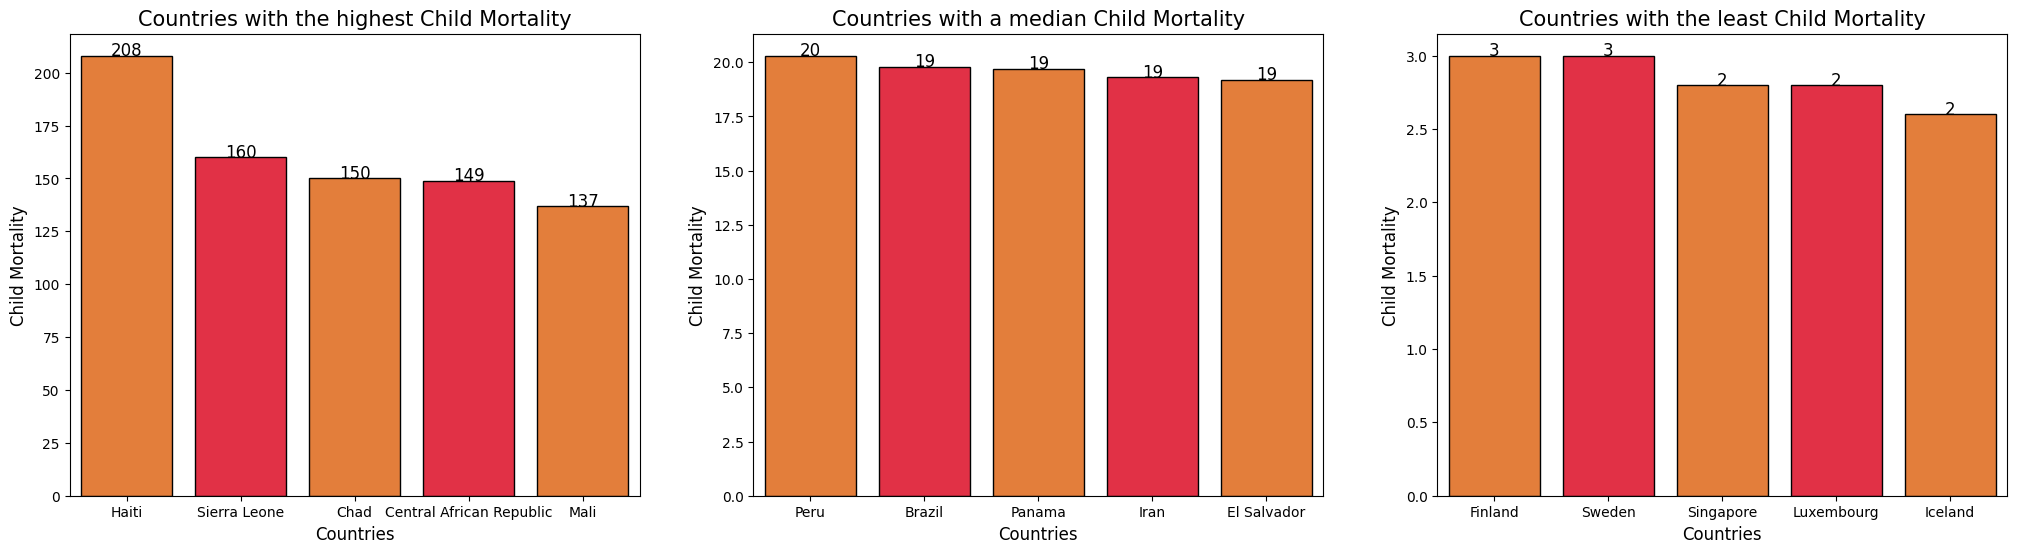

In [10]:
colors = ["#FF781F", "#FF132F"]
fig = plt.subplots(nrows=1,ncols=3, figsize=(25,6))

plt.subplot(1, 3, 1)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['child_mort']).head(), x='country', y='child_mort',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Child Mortality', fontsize=12)
plt.title('Countries with the highest Child Mortality', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 2)
ax = sns.barplot(data=df.sort_values(ascending=False, by=['child_mort']).iloc[80:85], x='country', y='child_mort',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Child Mortality', fontsize=12)
plt.title('Countries with a median Child Mortality', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 3)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['child_mort']).tail(), x='country', y='child_mort',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Child Mortality', fontsize=12)
plt.title('Countries with the least Child Mortality', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

**Child Mortality Summary**

We can observe that the countries with the lowest child mortality rates are primarily in Europe, including Finland, Sweden, Luxembourg, and Iceland, with one exception in Asia (Singapore).

Countries with average child mortality rates are predominantly found in the Americas, such as Peru, Brazil, Panama, and El Salvador, along with one Asian country (Iran).

On the other hand, countries with the highest child mortality rates are mostly located in Africa, including Sierra Leone, Chad, the Central African Republic, and Mali, with Haiti having the highest rate at 208.

From this data, we can discern valuable insights: European countries tend to have lower child mortality rates, followed by Asian countries as evidenced by Singapore and Iran. American countries typically fall in the middle range of child mortality rates, while African countries are more likely to have higher child mortality rates compared to the rest of the world.

### Exports Analysis

**The analysis of export data could provide insights into the country in question. A country with high exports could be considered developed, as it may export high-value manufactured products. Conversely, low exports could indicate an underdeveloped country with few or no products available for export.**

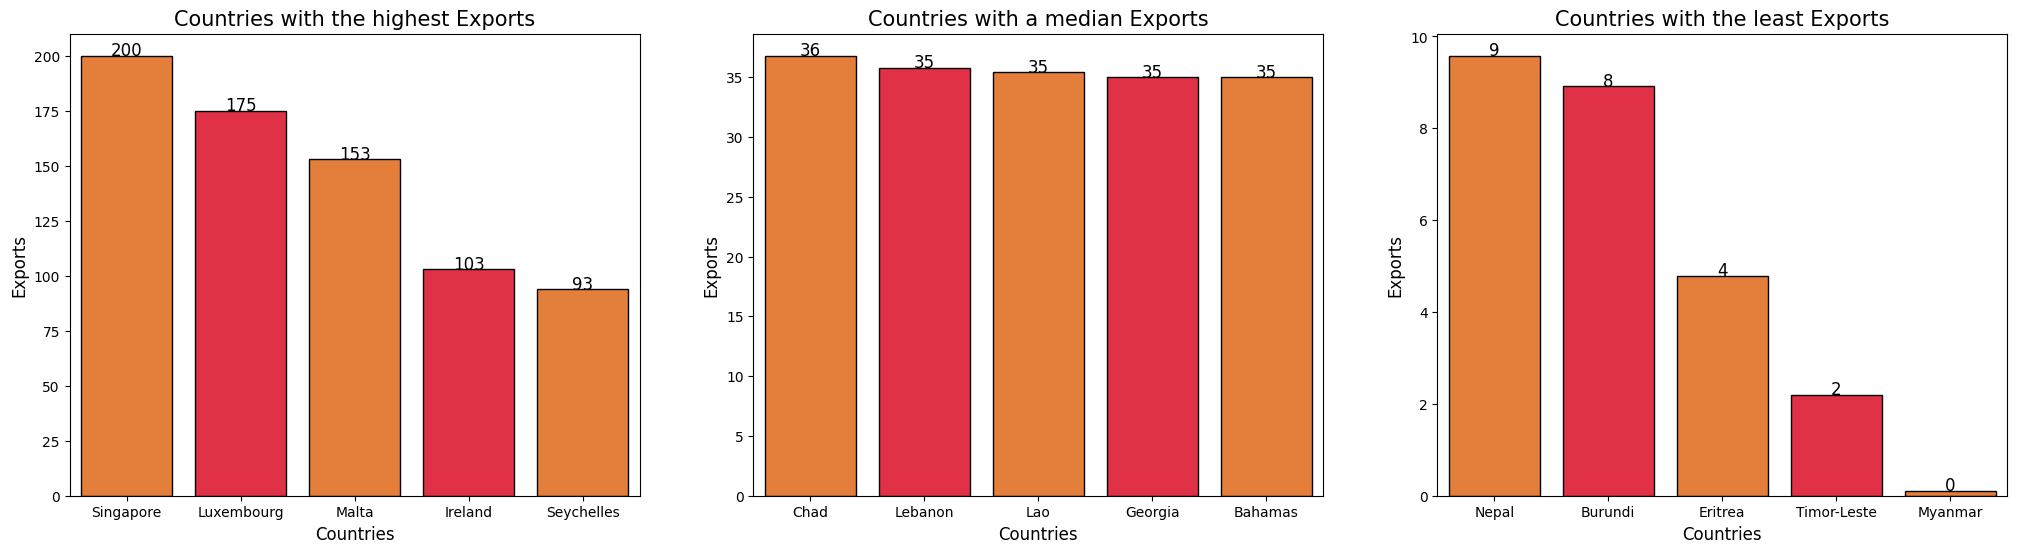

In [11]:
fig = plt.subplots(nrows=1,ncols=3, figsize=(25,6))

plt.subplot(1, 3, 1)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['exports']).head(), x='country', y='exports',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Exports', fontsize=12)
plt.title('Countries with the highest Exports', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 2)
ax = sns.barplot(data=df.sort_values(ascending=False, by=['exports']).iloc[80:85], x='country', y='exports',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Exports', fontsize=12)
plt.title('Countries with a median Exports', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 3)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['exports']).tail(), x='country', y='exports',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Exports', fontsize=12)
plt.title('Countries with the least Exports', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

**Exports Summary**

As with child mortality, export data offers insights not into the wealth of a country itself but rather into the underlying factors. It's evident that the countries with the highest exports often have small populations, such as Singapore, Luxembourg, Malta, and Seychelles. This suggests a potential correlation between export levels and population size.

Conversely, in this case, we predominantly find Asian countries, along with two African nations. This implies that Asia encompasses both wealthy countries, like Singapore, and less affluent ones, such as Nepal, Timor-Leste, and Myanmar. These findings highlight significant disparities within the same continents, providing valuable insights from the available data.

### Health Analysis

**Health data can provide insights into a nation's wealth, as its citizens' ability to spend on healthcare correlates with their economic well-being.**

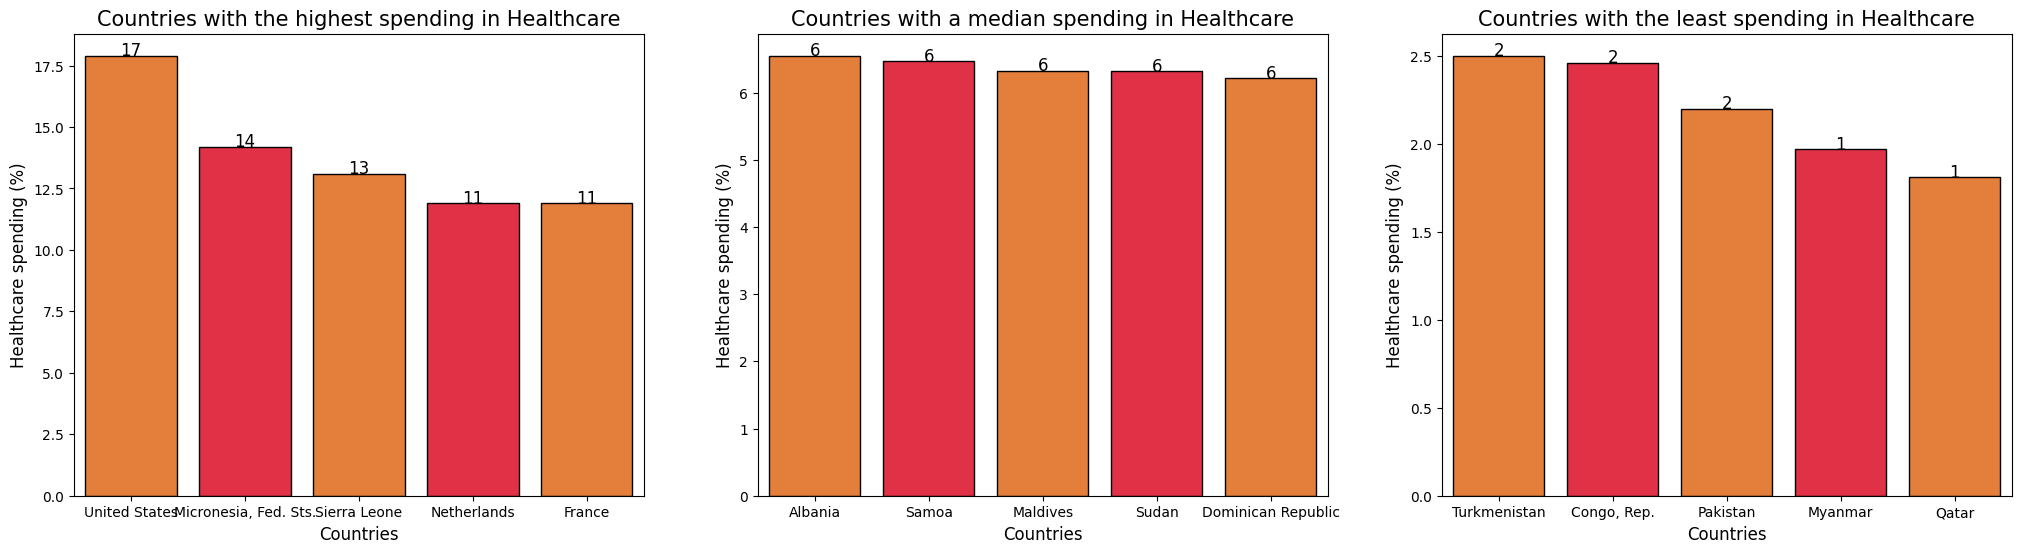

In [13]:
fig = plt.subplots(nrows=1,ncols=3, figsize=(25,6))

plt.subplot(1, 3, 1)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['health']).head(), x='country', y='health',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Healthcare spending (%)', fontsize=12)
plt.title('Countries with the highest spending in Healthcare', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 2)
ax = sns.barplot(data=df.sort_values(ascending=False, by=['health']).iloc[80:85], x='country', y='health',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Healthcare spending (%)', fontsize=12)
plt.title('Countries with a median spending in Healthcare', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 3)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['health']).tail(), x='country', y='health',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Healthcare spending (%)', fontsize=12)
plt.title('Countries with the least spending in Healthcare', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

**Health Summary**

In hindsight, this data can be misleading regarding wealth and aid needs. For instance, some countries, like the United States, are top spenders in healthcare, and they are among the wealthiest. But the Federated States of Micronesia are not in the wealthiest countries. Same as Sierra Leone which, we saw earlier, was among the countries with the highest child mortality.

Qatar, one of the world's wealthiest countries in terms of GDP per capita, has surprisingly low healthcare spending. These instances show that the data can lead to misconceptions if not interpreted carefully.

### Imports Analysis

**Analyzing imports is crucial for understanding a country's wealth, as they reflect its purchasing power.**

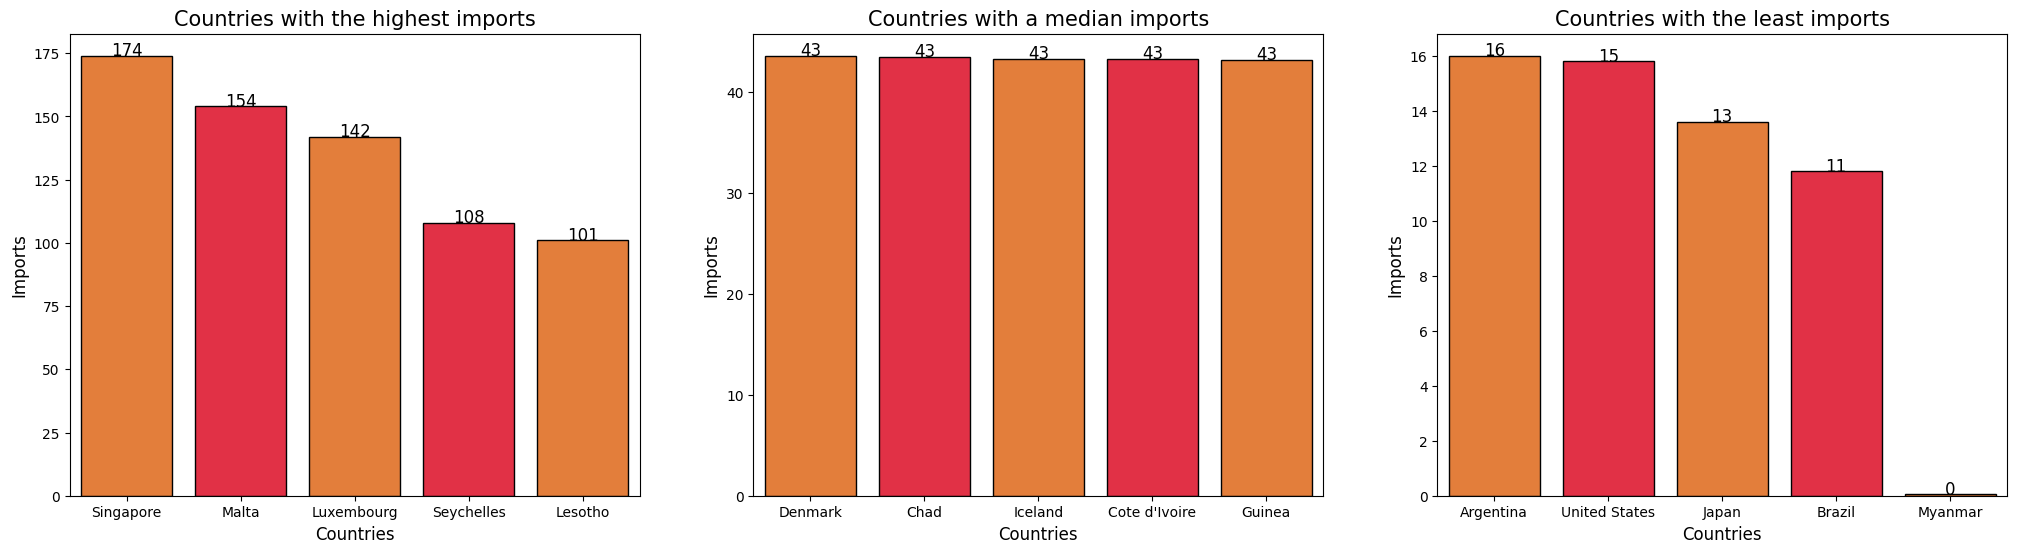

In [14]:
fig = plt.subplots(nrows=1,ncols=3, figsize=(25,6))

plt.subplot(1, 3, 1)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['imports']).head(), x='country', y='imports',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Imports', fontsize=12)
plt.title('Countries with the highest imports', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 2)
ax = sns.barplot(data=df.sort_values(ascending=False, by=['imports']).iloc[80:85], x='country', y='imports',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Imports', fontsize=12)
plt.title('Countries with a median imports', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 3)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['imports']).tail(), x='country', y='imports',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Imports', fontsize=12)
plt.title('Countries with the least imports', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

**Imports Summary**

Similar to health, the analysis of imports requires careful consideration. Among the top importing countries, we observe the typical small-population, wealthy nations like Singapore, Malta, and Luxembourg. Yet, Lesotho, despite its lower wealth, also features in this group.

The mid-range importers exhibit a mix of wealthy European countries like Denmark and Iceland, as well as less affluent African nations such as Chad, Cote d'Ivoire, and Guinea.

The countries with the lowest imports mirror the overall data: wealthy nations like the US and Japan and developing countries like Brazil and Myanmar.

### Income Analysis

**This data will be one of the most crucial for assessing a country's wealth, as it indicates the economic well-being of its citizens.**

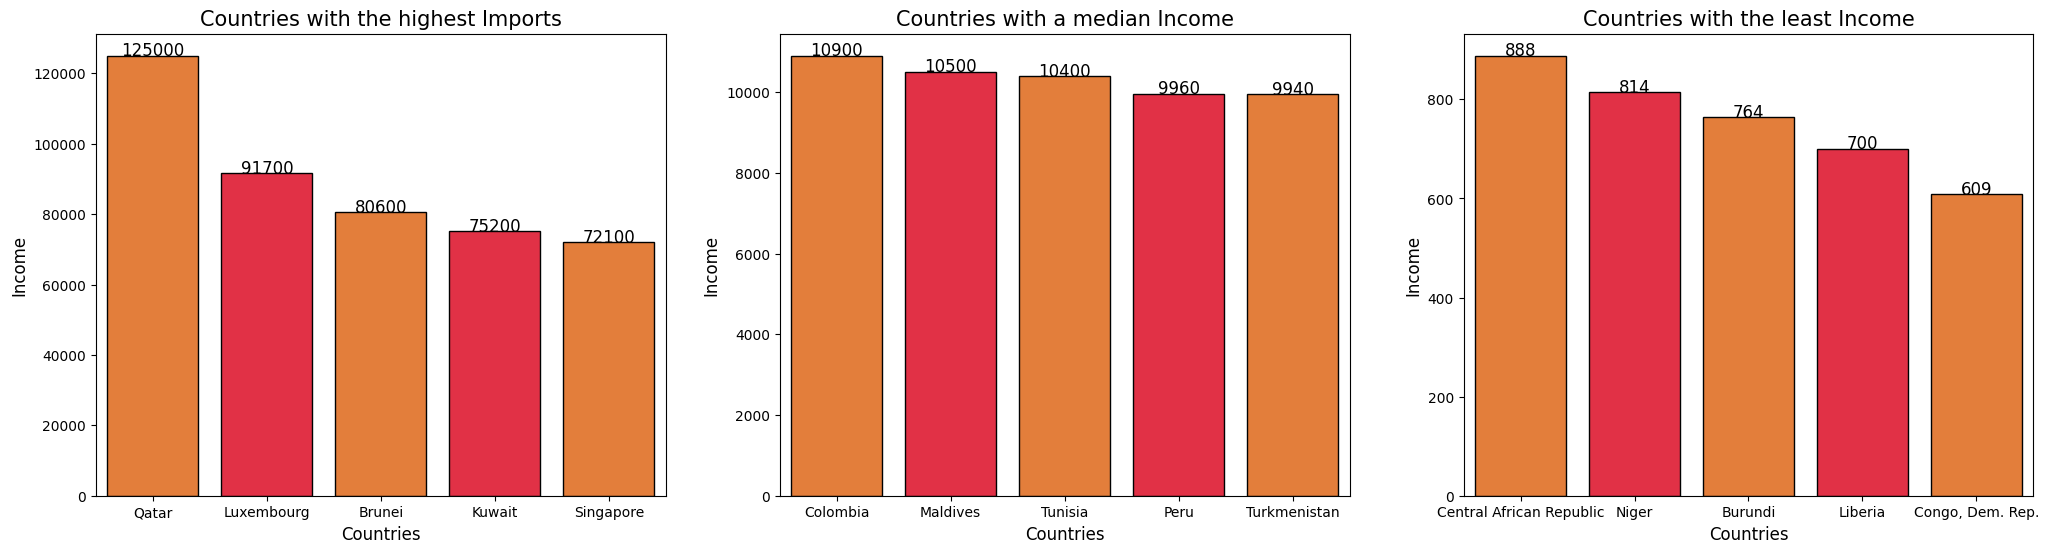

In [15]:
fig = plt.subplots(nrows=1,ncols=3, figsize=(25,6))

plt.subplot(1, 3, 1)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['income']).head(), x='country', y='income',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.title('Countries with the highest Imports', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 2)
ax = sns.barplot(data=df.sort_values(ascending=False, by=['income']).iloc[80:85], x='country', y='income',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.title('Countries with a median Income', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 3)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['income']).tail(), x='country', y='income',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.title('Countries with the least Income', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

**Income Summary**

This feature is highly indicative of a country's economic well-being but doesn't encompass the broader aspect of general well-being, which involves multiple factors.

Examining income data reveals significant disparities. Qatar, despite its low health spending, boasts the highest income by a substantial margin. Other high-income countries include Luxembourg, Singapore, Brunei, and Kuwait. Notably, Brunei and Kuwait are geographically close, suggesting regional wealth patterns.

The median-income group encompasses countries from various regions, such as Colombia, Tunisia, and Turkmenistan. What stands out most is the stark contrast between the top 5, middle 5, and last 5. For instance, Singapore's median income of 72,100 is approximately 60,000 higher than Colombia's, while the difference between Colombia and the Democratic Republic of Congo is only 8,000, illustrating significant global income inequality.

In the last group, all five countries are in Africa, underscoring the need for assistance in these regions, given their frequent placement among the world's least wealthy countries.

### Inflation Anaysis

**Inflation can be an indicator of the state of the country's economic wellbeing through the strength of its currency.**

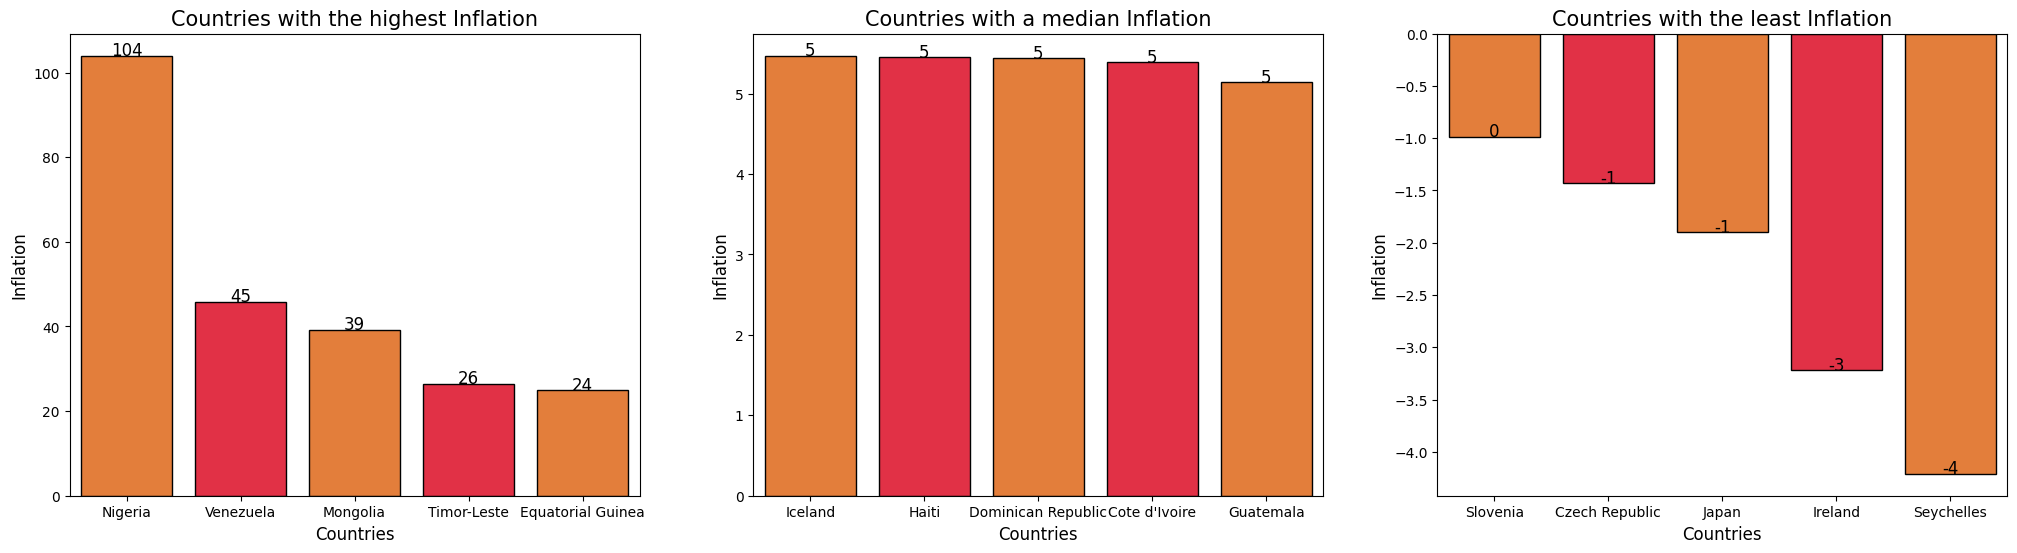

In [16]:
fig = plt.subplots(nrows=1,ncols=3, figsize=(25,6))

plt.subplot(1, 3, 1)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['inflation']).head(), x='country', y='inflation',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Inflation', fontsize=12)
plt.title('Countries with the highest Inflation', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 2)
ax = sns.barplot(data=df.sort_values(ascending=False, by=['inflation']).iloc[80:85], x='country', y='inflation',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Inflation', fontsize=12)
plt.title('Countries with a median Inflation', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 3)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['inflation']).tail(), x='country', y='inflation',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Inflation', fontsize=12)
plt.title('Countries with the least Inflation', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

**Inflation Summary**

Higher inflation erodes the purchasing power of citizens, and countries with exceptionally high inflation rates face a dire economic situation. Such severe inflation can jeopardize a nation's stability.

On the other hand, the lower end of the inflation spectrum results in negative values, known as deflation. Deflation signals an economy in a downward spiral, often leading to a recession or even a depression.

### Life Expectancy Analysis

A higher life expectancy reflects the overall health and well-being of citizens, both physically and mentally.

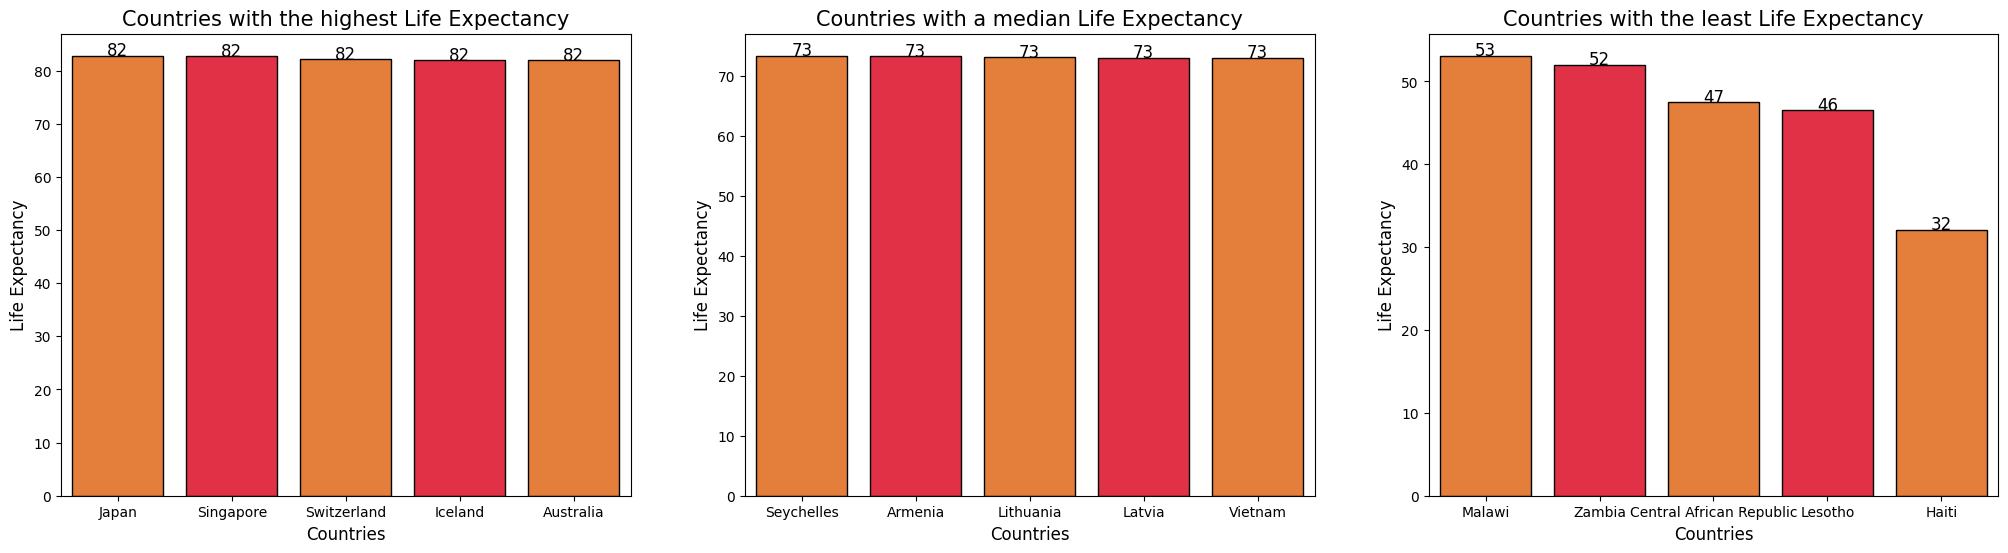

In [19]:
fig = plt.subplots(nrows=1,ncols=3, figsize=(25,6))

plt.subplot(1, 3, 1)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['life_expec']).head(), x='country', y='life_expec',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.title('Countries with the highest Life Expectancy', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 2)
ax = sns.barplot(data=df.sort_values(ascending=False, by=['life_expec']).iloc[80:85], x='country', y='life_expec',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.title('Countries with a median Life Expectancy', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 3)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['life_expec']).tail(), x='country', y='life_expec',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.title('Countries with the least Life Expectancy', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

**Life Expectancy Summary**

Life expectancy depends significantly on the mental state and lifestyle choices of citizens. Singapore once again ranks among the top 5 in this feature.

Interestingly, none of the countries with high life expectancy are in the top 5 for health-related spending by their citizens.

African countries, on the other hand, tend to be found in the lower end of this feature.

### Total Fertility Analysis

**Countries with a lower level of economic development often exhibit higher fertility rates.**

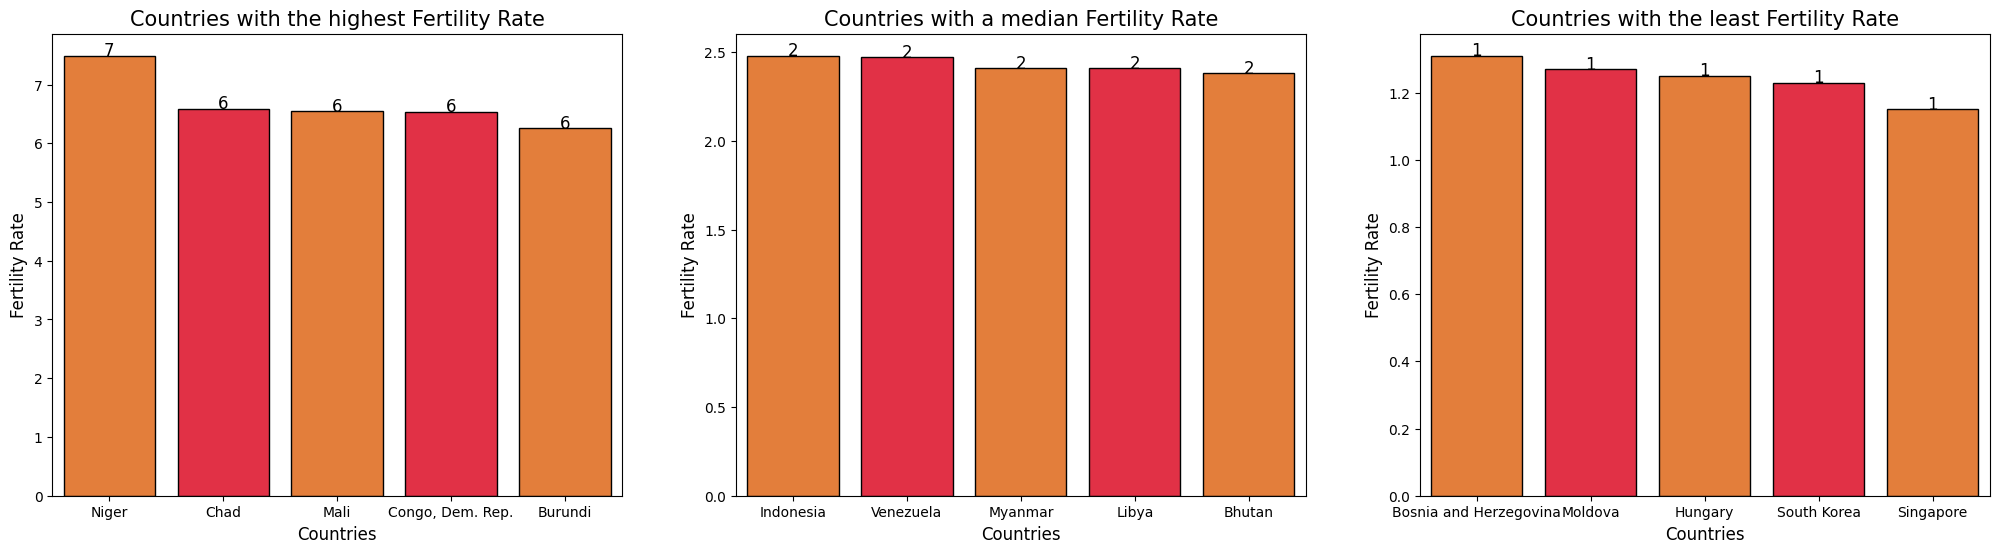

In [21]:
fig = plt.subplots(nrows=1,ncols=3, figsize=(25,6))

plt.subplot(1, 3, 1)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['total_fer']).head(), x='country', y='total_fer',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Fertility Rate', fontsize=12)
plt.title('Countries with the highest Fertility Rate', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 2)
ax = sns.barplot(data=df.sort_values(ascending=False, by=['total_fer']).iloc[80:85], x='country', y='total_fer',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Fertility Rate', fontsize=12)
plt.title('Countries with a median Fertility Rate', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 3)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['total_fer']).tail(), x='country', y='total_fer',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Fertility Rate', fontsize=12)
plt.title('Countries with the least Fertility Rate', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

**Total Fertility Summary**

African countries mostly have high total fertility rates, typically exceeding 6.

The mean total fertility rate is around 2, while lower values around 1 raise concerns.

### GDP Per Capital Analysis

**It is a feature that provides information about the contribution of a citizen to its GDP.**

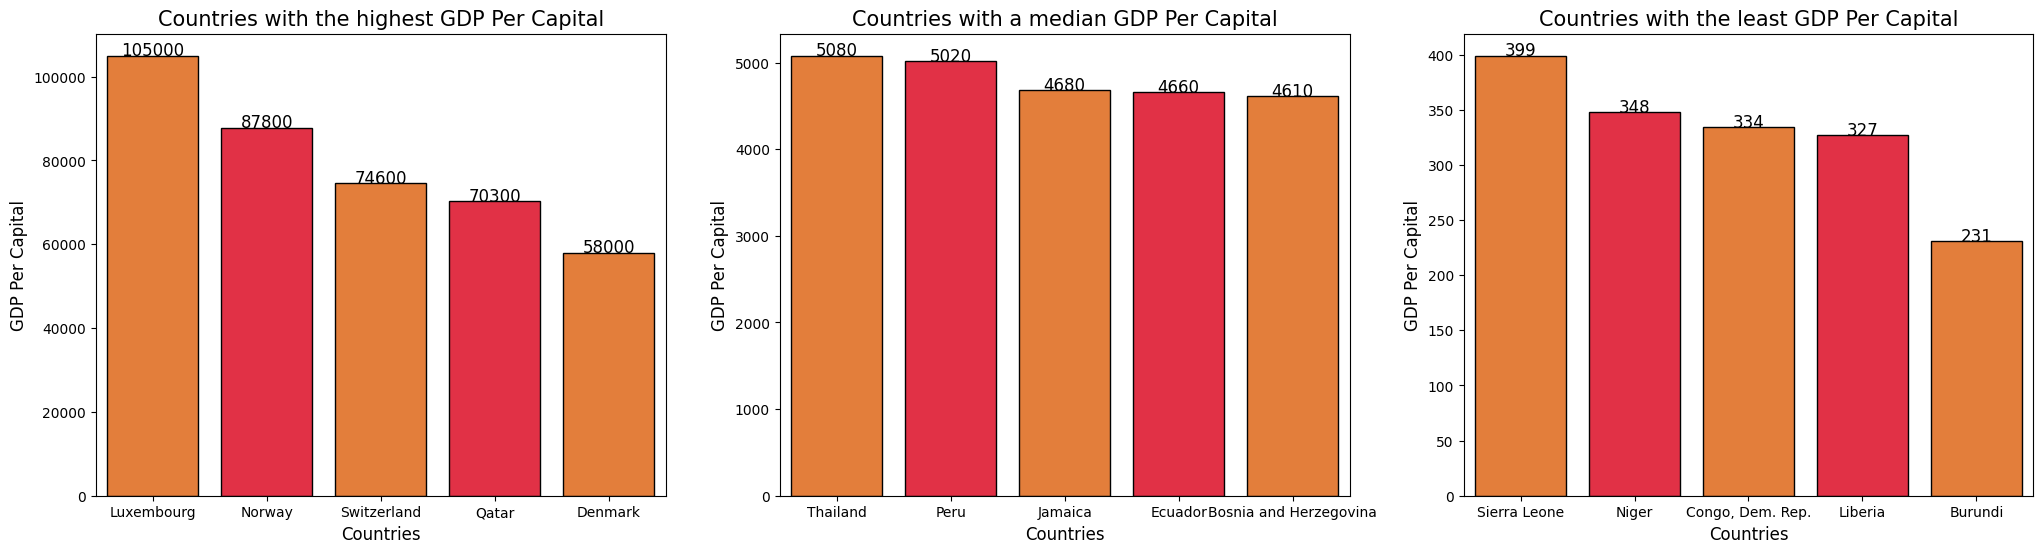

In [22]:
fig = plt.subplots(nrows=1,ncols=3, figsize=(25,6))

plt.subplot(1, 3, 1)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['gdpp']).head(), x='country', y='gdpp',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('GDP Per Capital', fontsize=12)
plt.title('Countries with the highest GDP Per Capital', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 2)
ax = sns.barplot(data=df.sort_values(ascending=False, by=['gdpp']).iloc[80:85], x='country', y='gdpp',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('GDP Per Capital', fontsize=12)
plt.title('Countries with a median GDP Per Capital', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 3)
ax = sns.barplot(data = df.sort_values(ascending=False, by=['gdpp']).tail(), x='country', y='gdpp',
                palette=colors, edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('GDP Per Capital', fontsize=12)
plt.title('Countries with the least GDP Per Capital', fontsize=15)
for rec in ax.patches:
    ax.text(rec.get_x() + rec.get_width()/2, rec.get_height(), int(rec.get_height()),
           horizontalalignment='center', fontsize=12)

**GDP Per Capital Summary**

This feature is tricky because a nation's population plays a significant role. China is a prime example, with its massive population and GDP.

Luxembourg is once again at the top, and Switzerland and Qatar are among the top 5, similar to income.

On the other hand, the lower end is primarily occupied by African nations, often considered economically less developed.

### Looking at Outliers

In [31]:
col = list(df.columns)
col.remove('country')
cat_feature = ['country']
num_feature = [*col]

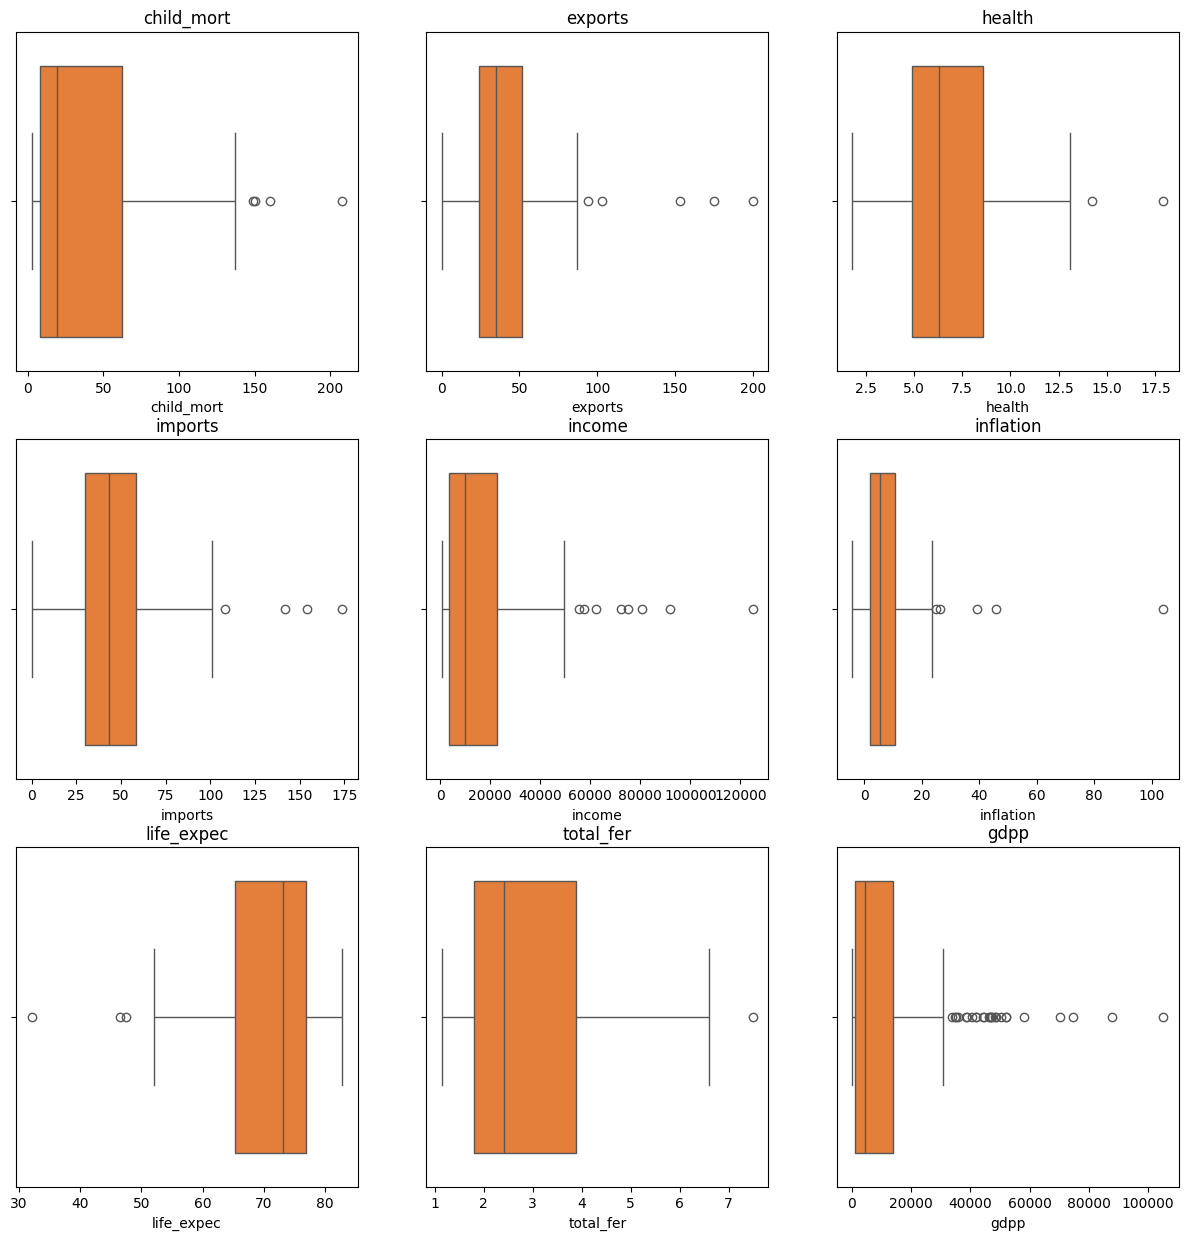

In [32]:
fig = plt.subplots(3, 3, figsize = (15, 15))
for i in range(len( num_feature)):
    plt.subplot(3,3, i+1)
    ax = sns.boxplot(x=df[num_feature[i]], color=colors[0])
    plt.title(num_feature[i])
plt.show()

# Summary Data Analysis

- From the visualizations and the list of features of economically disadvantaged nations, a multitude of insights can be gained.


- Regarding health conditions, African countries often rank poorly in child mortality, life expectancy, and total fertility. Haiti has the highest child mortality despite these serious issues. Asian and European countries excel in this regard.


- In the United States, citizens are high spenders on healthcare, but they do not rank in the top 5 for life expectancy or total fertility. High life expectancy countries do not feature in the top 5 for health. Asian countries are prevalent in the lower end of health rankings.


- Singapore, Malta, Luxembourg, and Seychelles excel in both exports and imports, influenced by population size and geographical location. Sudan is the only African nation with low imports, while Brazil has the lowest imports.


- African countries tend to have high inflation rates, while countries from all continents can be found with low inflation values.


- Qatar boasts the highest incomes, with Singapore and Luxembourg also ranking in the top 5. Luxembourg excels in GDP per capita, with Switzerland and Qatar also in the top 5. African nations typically occupy the lower end of income and GDP per capita rankings, a legacy of colonization.

# Data Engineering

In [10]:
africa = ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", 
"Central African Republic", "Chad", "Comoros", "Congo, Dem. Rep.", "Congo, Rep.", "Costa Rica", "Cote d'Ivoire", "Egypt",
"Equatorial Guinea", "Eritrea", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", "Libya",
"Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", 'Namibia', "Niger", "Nigeria", "Rwanda", "Senegal",
"Seychelles", "Sierra Leone", "South Africa", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia"]
europe = ["Albania", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
"Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Latvia", "Lithuania",
"Luxembourg", "Macedonia, FYR", "Malta", "Moldova", "Montenegro", "Netherlands", "Norway", "Poland", "Portugal", "Romania", "Russia", "Serbia",
"Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom"]
north_america = ["Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Dominican Republic", 
"El Salvador", "Grenada", "Guatemala", "Haiti", "Jamaica", "Panama", "St. Vincent and the Grenadines", "United States"]
south_america = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname",
"Uruguay", "Venezuela"] 
oceania = ["Australia", "Fiji", "Kiribati", "Micronesia, Fed. Sts.", "New Zealand", "Samoa", "Solomon Islands", "Tonga", "Vanuatu"]

In [11]:
asia=[]
for c in countries:
    if c not in (africa+europe+north_america+south_america+oceania):
        asia.append(c)

In [12]:
continents = {
    'Africa': africa,
    'Asia': asia,
    'Europe': europe,
    'North-America': north_america,
    'South-America': south_america,
    'Oceania': oceania
}

In [13]:
df['continent'] = None
for continent, countries in continents.items():
    df.loc[df.index.isin(countries), 'continent'] = continent

In [14]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Asia
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Europe
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Africa
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Africa
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,North-America


In [15]:
df.dtypes

child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
continent      object
dtype: object

In [16]:
df_num = df.drop(columns='continent')
num_transformer_simplified = make_pipeline(
                    SimpleImputer(strategy = "median"),
                    RobustScaler()
                ).set_output(transform="pandas")

In [17]:
pd.DataFrame(num_transformer_simplified.fit_transform(df_num), columns=df_num.columns).head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.316620,-0.907441,0.342391,0.056042,-0.429416,0.453020,-1.469565,1.635492,-0.322877
Albania,-0.050139,-0.254083,0.062500,0.185639,-0.001543,-0.100671,0.278261,-0.364508,-0.044811
Algeria,0.148561,0.123412,-0.584239,-0.416813,0.151196,1.197987,0.295652,0.230216,-0.015723
Angola,1.851439,0.990926,-0.942935,-0.014011,-0.208794,1.902685,-1.130435,1.798561,-0.088836
Antigua and Barbuda,-0.167131,0.381125,-0.078804,0.546410,0.470044,-0.441834,0.321739,-0.134293,0.592767


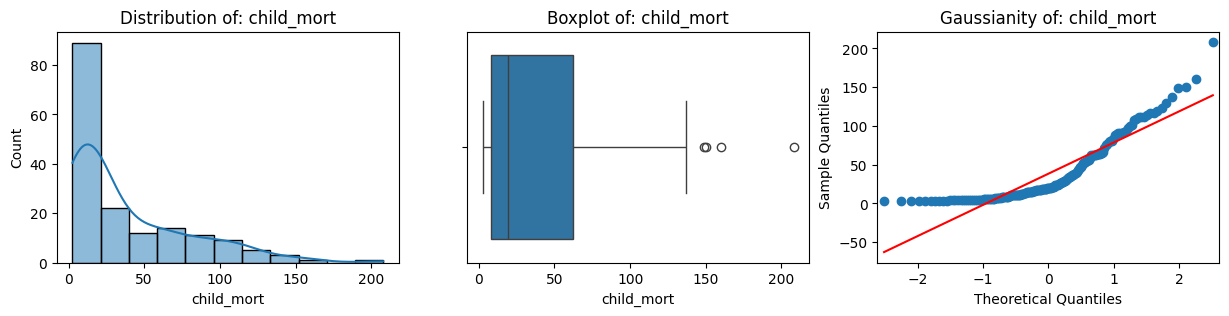

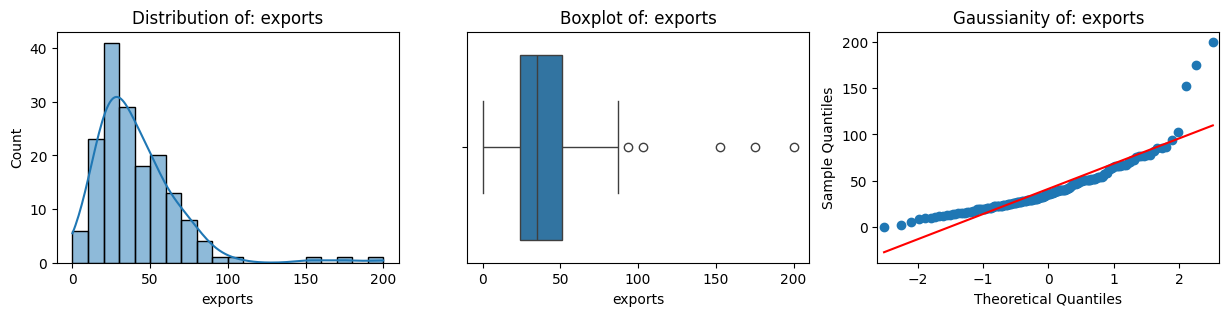

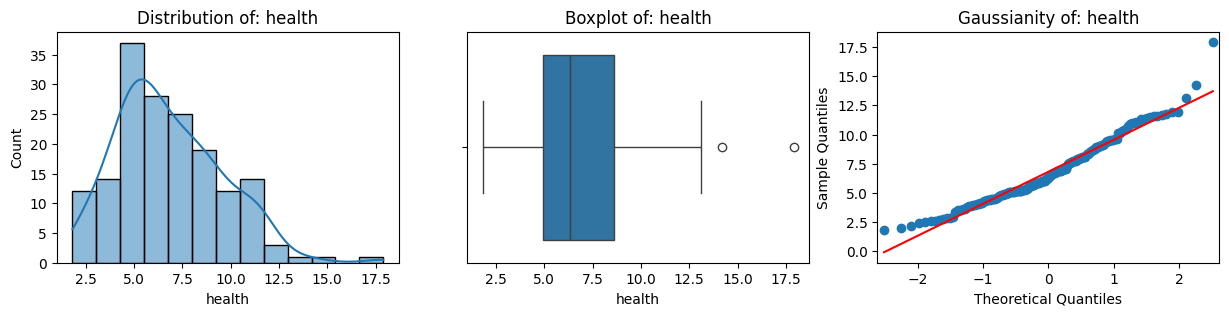

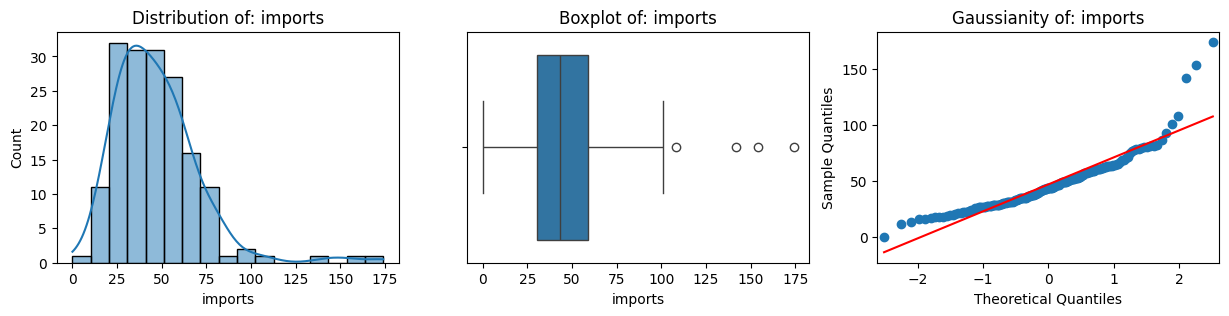

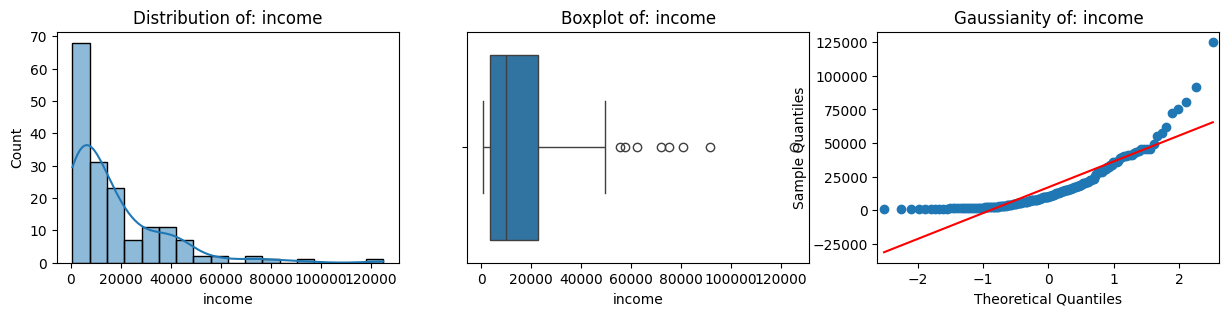

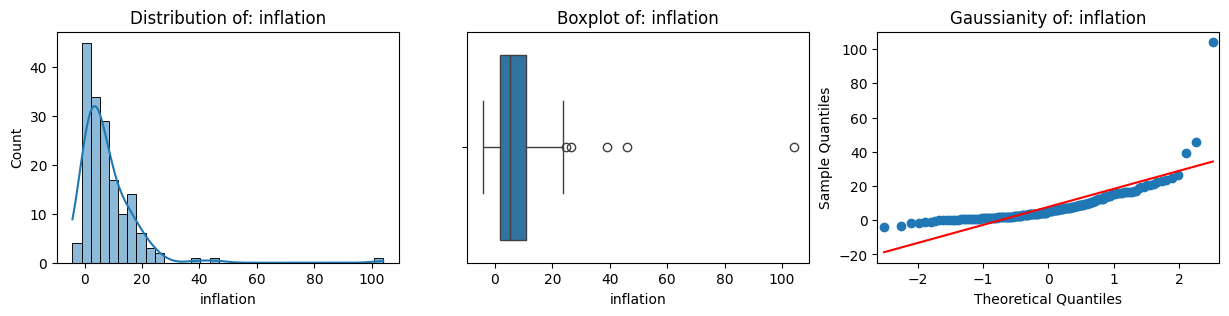

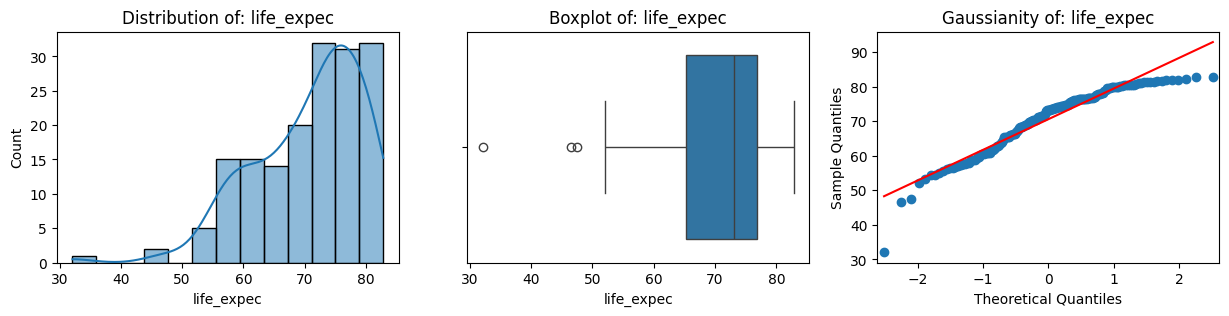

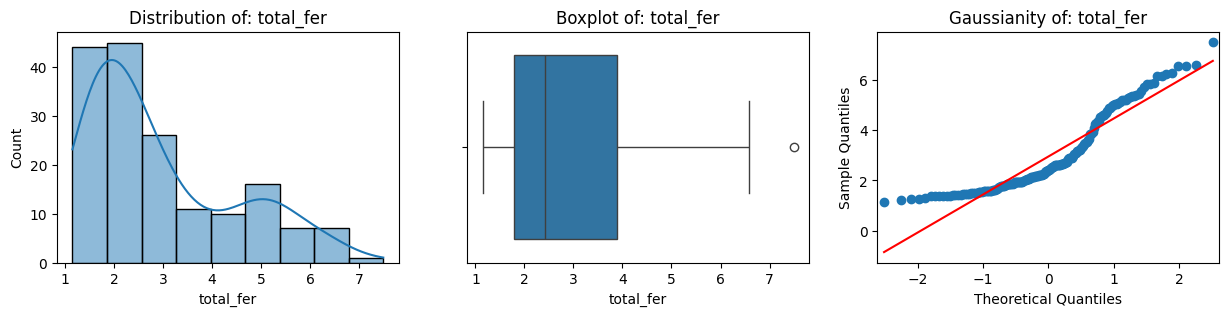

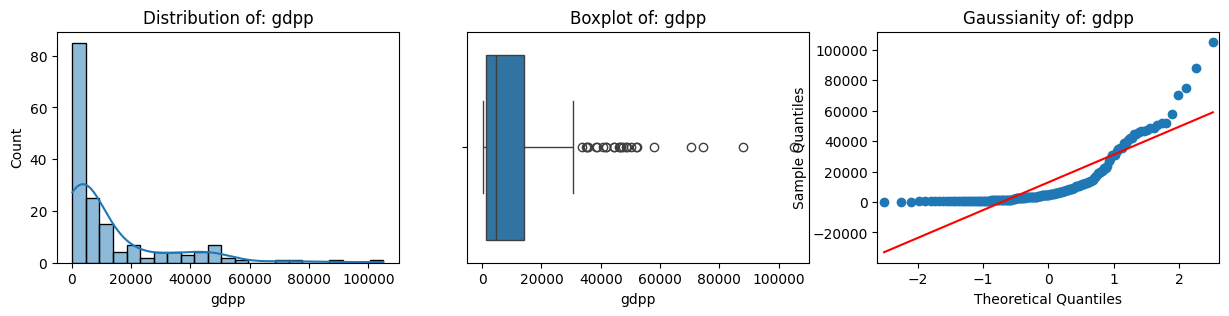

In [18]:
for numerical_feature in df_num.columns:
    
    fig, ax =plt.subplots(1,3,figsize=(15,3))
    
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = df_num, x = numerical_feature, kde=True, ax = ax[0])
    
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(data = df_num, x = numerical_feature, ax=ax[1])
    
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(df_num[numerical_feature],line='s',ax=ax[2]);

In [19]:
robust_scaler = ['child_mort', 'imports', 'exports', 'gdpp', 'inflation', 'income']
minmax_scaler = ['total_fer', 'life_expec']
standard_scaler = ['health']

In [20]:
df_num.shape[-1] == len(robust_scaler + minmax_scaler + standard_scaler)

True

In [21]:
scalers = ColumnTransformer([
    ("robust_scaler", RobustScaler(), robust_scaler),
    ("mixmax_scaler", MinMaxScaler(), minmax_scaler),
    ("standard_scaler", StandardScaler(), standard_scaler)
]).set_output(transform="pandas")

In [22]:
transformer = make_pipeline(
                SimpleImputer(strategy="median").set_output(transform="pandas"),
                scalers.set_output(transform="pandas").set_output(transform="pandas"))

In [23]:
df_num_scaled = transformer.fit_transform(df_num)
df_num_scaled.head()

,robust_scaler__child_mort,robust_scaler__imports,robust_scaler__exports,robust_scaler__gdpp,robust_scaler__inflation,robust_scaler__income,mixmax_scaler__total_fer,mixmax_scaler__life_expec,standard_scaler__health
country,,,,,,,,,
Afghanistan,1.316620,0.056042,-0.907441,-0.322877,0.453020,-0.429416,0.736593,0.475345,0.279088
Albania,-0.050139,0.185639,-0.254083,-0.044811,-0.100671,-0.001543,0.078864,0.871795,-0.097016
Algeria,0.148561,-0.416813,0.123412,-0.015723,1.197987,0.151196,0.274448,0.875740,-0.966073
Angola,1.851439,-0.014011,0.990926,-0.088836,1.902685,-0.208794,0.790221,0.552268,-1.448071
Antigua and Barbuda,-0.167131,0.546410,0.381125,0.592767,-0.441834,0.470044,0.154574,0.881657,-0.286894


Now we do know which continent each country is in, but can a Cluster model detect accurately based on the data?

# Clustering with K-Means

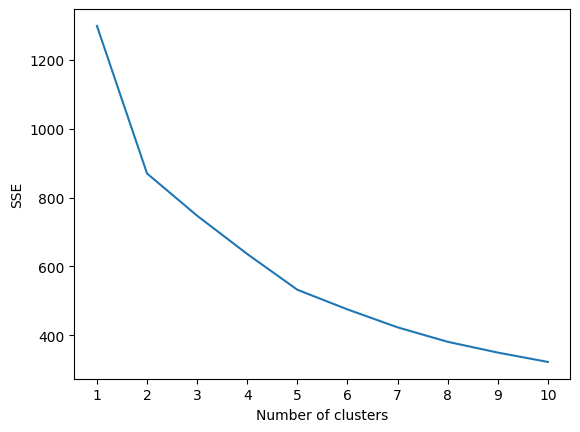

In [24]:
kmeans_kwargs = {
"init": "random",
"n_init": 300,
"random_state": 1,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_num_scaled)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

We can see two elbows: the first one at 2 clusters and the second at 5 clusters.\
For now, let's look at the first one. Through which parameter can we group with two clusters?

## K-Means for 2 clusters

In [25]:
km_model = KMeans(n_clusters=2, max_iter=300, random_state=1)

In [26]:
km_model.fit(df_num_scaled)
km_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [27]:
df_num['labels'] = km_model.labels_
labels = km_model.predict(df_num_scaled)

In [28]:
centroids = km_model.cluster_centers_
print('The centroids are:', centroids)

The centroids are: [[ 5.26862367e-01  8.19792267e-02  4.62373307e-02  8.55104015e-04
   4.32880743e-01 -3.90596752e-02  3.37114778e-01  7.05719921e-01
  -2.04454528e-01]
 [-2.61135788e-01  2.79547498e-01  8.38377397e-01  2.94360870e+00
  -3.13374448e-01  1.80492449e+00  9.55324410e-02  9.43920252e-01
   7.18353747e-01]]


In [29]:
mean_centroid = df_num.groupby('labels').mean()
cluster_0_values = mean_centroid.loc[0]
cluster_1_values = mean_centroid.loc[1]
feature_influences = (cluster_1_values - cluster_0_values).sort_values(ascending=False)
print('The values for the mean_centroid of In Development countries are:\n',cluster_0_values.sort_values(ascending=False))
print('--'*50)
print('The values for the mean_centroid of Developed countries are:\n',cluster_1_values.sort_values(ascending=False))
print('--'*50)
print('The values playing the most in clustering are:\n',feature_influences)

The values for the mean_centroid of In Development countries are:
 income        9200.484615
gdpp          4670.876923
life_expec      67.880000
child_mort      47.671538
imports         45.640507
exports         36.273838
inflation        9.259954
health           6.255769
total_fer        3.287308
Name: 0, dtype: float64
----------------------------------------------------------------------------------------------------
The values for the mean_centroid of Developed countries are:
 income        45056.756757
gdpp          42102.702703
life_expec       79.956757
exports          58.097297
imports          51.281081
health            8.782973
child_mort        5.237838
inflation         2.588432
total_fer         1.755676
Name: 1, dtype: float64
----------------------------------------------------------------------------------------------------
The values playing the most in clustering are:
 gdpp          37431.825780
income        35856.272141
exports          21.823459
life_expec     

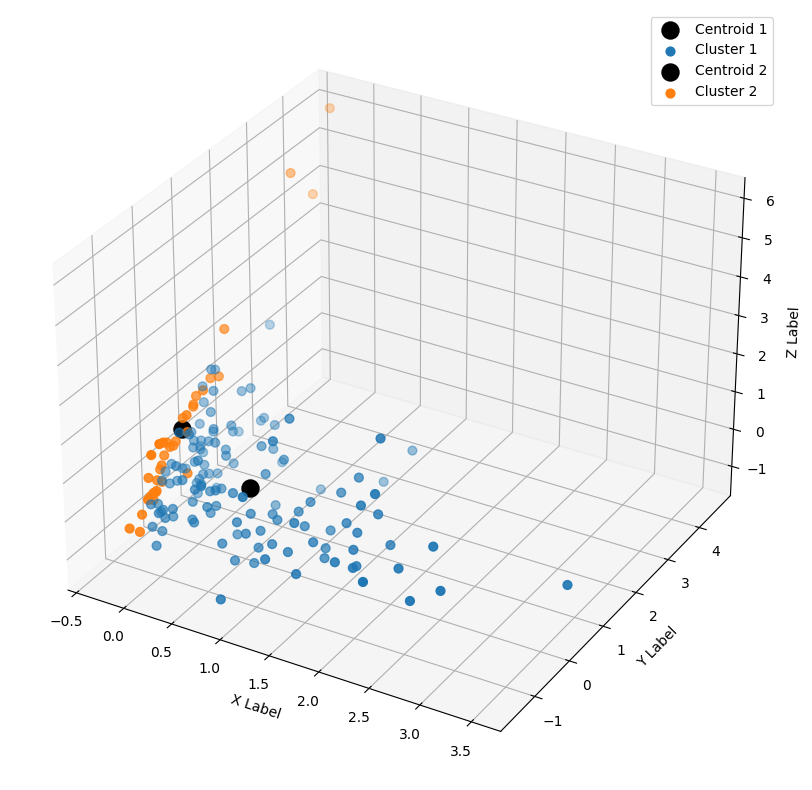

In [30]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

for cluster_label in range(2):
    cluster_indices = np.where(labels == cluster_label)[0] 
    cluster_centroid = centroids[cluster_label]
    ax.scatter(cluster_centroid[0], cluster_centroid[1], cluster_centroid[2], c="black", s=150, label=f"Centroid {cluster_label + 1}")
    
    cluster_data = df_num_scaled.iloc[cluster_indices] 
    ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], label=f"Cluster {cluster_label + 1}", s=40)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend()

In [31]:
df_with_labels = df_num_scaled.copy()
df_with_labels['Cluster'] = labels  

fig = px.scatter_3d(
    df_with_labels,
    x='robust_scaler__child_mort',  
    y='robust_scaler__income',      
    z='standard_scaler__health',     
    color='Cluster',
    title='Interactive 3D Scatter Plot'
)
fig.show()

In [121]:
df_num_scaled

,robust_scaler__child_mort,robust_scaler__imports,robust_scaler__exports,robust_scaler__gdpp,robust_scaler__inflation,robust_scaler__income,mixmax_scaler__total_fer,mixmax_scaler__life_expec,standard_scaler__health
country,,,,,,,,,
Afghanistan,1.316620,0.056042,-0.907441,-0.322877,0.453020,-0.429416,0.736593,0.475345,0.279088
Albania,-0.050139,0.185639,-0.254083,-0.044811,-0.100671,-0.001543,0.078864,0.871795,-0.097016
Algeria,0.148561,-0.416813,0.123412,-0.015723,1.197987,0.151196,0.274448,0.875740,-0.966073
Angola,1.851439,-0.014011,0.990926,-0.088836,1.902685,-0.208794,0.790221,0.552268,-1.448071
Antigua and Barbuda,-0.167131,0.546410,0.381125,0.592767,-0.441834,0.470044,0.154574,0.881657,-0.286894
...,...,...,...,...,...,...,...,...,...
Vanuatu,0.183844,0.329247,0.421053,-0.132862,-0.309843,-0.360504,0.370662,0.609467,-0.571711
Venezuela,-0.040854,-0.900175,-0.235935,0.694969,4.531320,0.336333,0.208202,0.854043,-0.695862
Vietnam,0.074280,1.292469,1.343013,-0.263365,0.750559,-0.281306,0.126183,0.808679,0.008877


In [34]:
np.mean(df_num_scaled), np.std(df_num_scaled)

(0.3368586119238245,
 robust_scaler__child_mort    0.746667
 robust_scaler__imports       0.845429
 robust_scaler__exports       0.992008
 robust_scaler__gdpp          1.436615
 robust_scaler__inflation     1.178860
 robust_scaler__income        0.988442
 mixmax_scaler__total_fer     0.238061
 mixmax_scaler__life_expec    0.174882
 standard_scaler__health      1.000000
 dtype: float64)

## Principal Component Analysis (PCA)

In [110]:
pca = PCA()
pca.fit(df_num_scaled)

PCA()

In [114]:
pca_country = pd.DataFrame(pca.transform(df_num_scaled))

In [115]:
pca_country.head()

,0,1,2,3,4,5,6,7,8
0,-1.697782,-0.544007,-0.473754,0.416041,0.678106,0.211084,0.283113,-0.180880,0.068042
1,-0.617262,-0.604436,0.139029,-0.244619,-0.555779,0.198944,0.171860,0.091486,-0.064528
2,-1.039621,1.005866,-0.058522,-0.537701,-0.497305,-0.038242,-0.109413,-0.025627,-0.080628
3,-1.658965,2.007345,0.735121,0.023404,1.099732,-0.246760,-0.457255,-0.078258,-0.070067
4,0.374843,-0.441117,0.637716,-0.406112,-0.370874,0.192115,0.141776,-0.022311,-0.038017


In [119]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.4700011  0.18273941 0.16906482 0.09821444 0.05252182 0.01385791
 0.01112868 0.00183278 0.00063903]


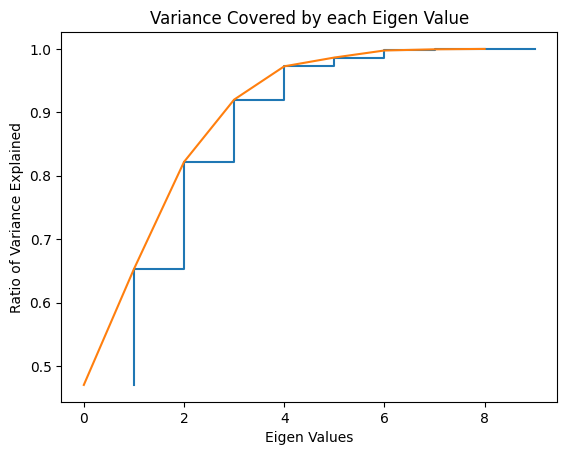

In [120]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

In [123]:
pca_country.drop(columns=[4, 5, 6, 7, 8], inplace=True)
pca_country.head()

,0,1,2,3
0,-1.697782,-0.544007,-0.473754,0.416041
1,-0.617262,-0.604436,0.139029,-0.244619
2,-1.039621,1.005866,-0.058522,-0.537701
3,-1.658965,2.007345,0.735121,0.023404
4,0.374843,-0.441117,0.637716,-0.406112


In [127]:
pca_country.rename(columns={0:'PC1', 1:'PC2', 2:'PC3', 3:'PC4'}, inplace=True)
pca_country.head()

,PC1,PC2,PC3,PC4
0,-1.697782,-0.544007,-0.473754,0.416041
1,-0.617262,-0.604436,0.139029,-0.244619
2,-1.039621,1.005866,-0.058522,-0.537701
3,-1.658965,2.007345,0.735121,0.023404
4,0.374843,-0.441117,0.637716,-0.406112


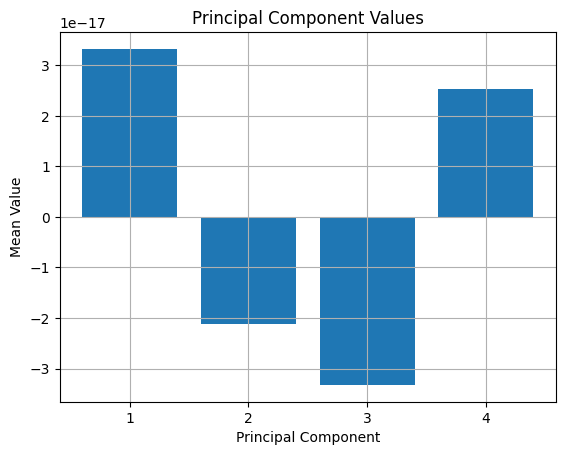

In [130]:
pc_values = pca_country[['PC1', 'PC2', 'PC3', 'PC4']]

plt.bar(range(1, 5), pc_values.mean())
plt.xlabel('Principal Component')
plt.ylabel('Mean Value')
plt.title('Principal Component Values')
plt.xticks(range(1, 5))
plt.grid()

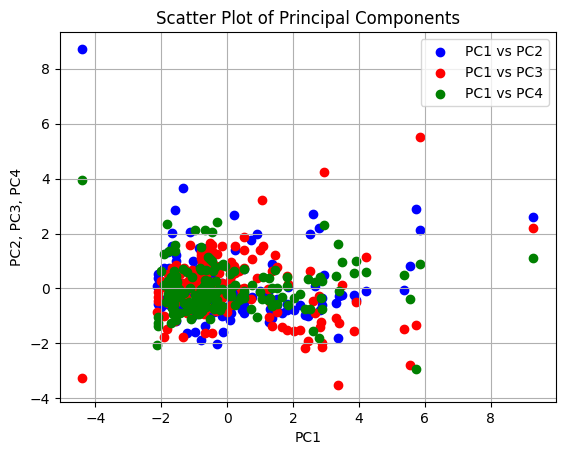

In [131]:
plt.scatter(pca_country['PC1'], pca_country['PC2'], c='b', label='PC1 vs PC2')
plt.scatter(pca_country['PC1'], pca_country['PC3'], c='r', label='PC1 vs PC3')
plt.scatter(pca_country['PC1'], pca_country['PC4'], c='g', label='PC1 vs PC4')
plt.xlabel('PC1')
plt.ylabel('PC2, PC3, PC4')
plt.title('Scatter Plot of Principal Components')
plt.legend()
plt.grid()

In [136]:
m1 = pca_country.values

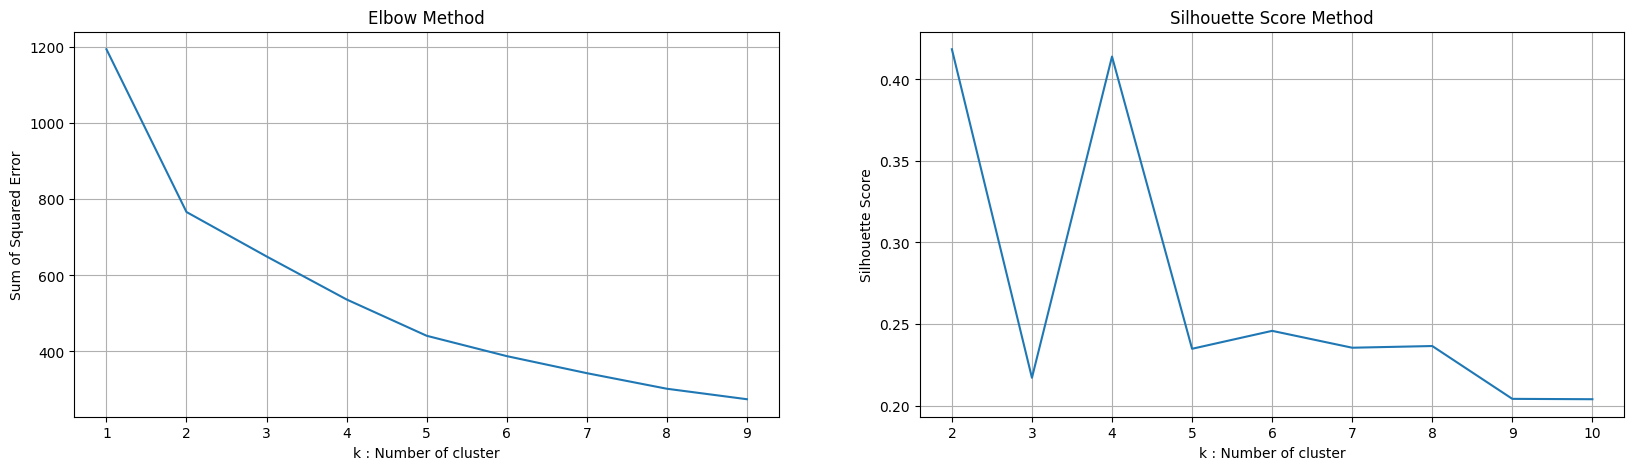

In [138]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = kmeans.inertia_ 
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_num_scaled, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

In [86]:
labels_cont = df_num['labels']
labels_cont = labels_cont.reset_index()

In [87]:
labels_cont.set_index('country', inplace=True)
labels_cont['country'] = labels_cont.index

In [90]:
df_pca1 = pd.concat([df_pca, labels_cont], axis=1)

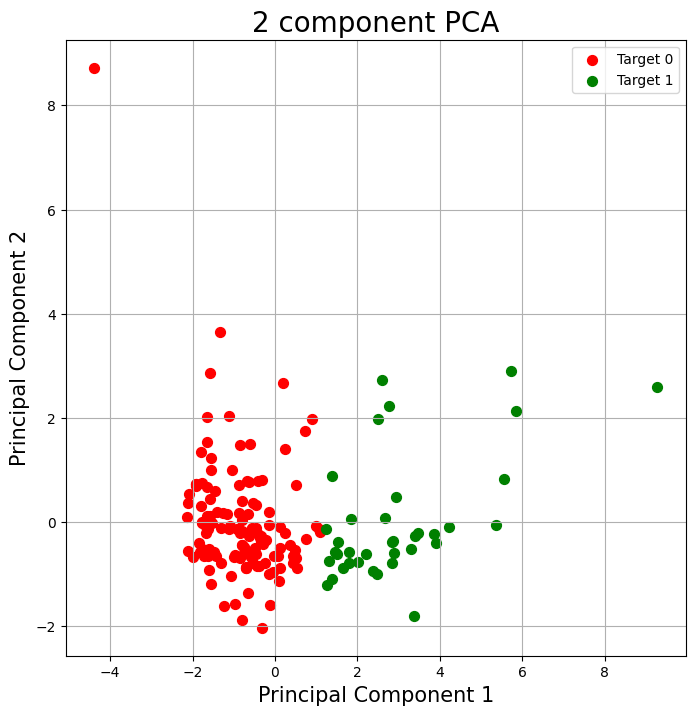

In [91]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = df_pca1['labels'] == target
    ax.scatter(
        df_pca1.loc[indicesToKeep, 'PC1'],
        df_pca1.loc[indicesToKeep, 'PC2'],
        c=color,
        s=50,
        label=f'Target {target}'
    )
ax.legend()
ax.grid()

In [98]:
fig = px.scatter(
    df_pca1,
    x='PC1',
    y='PC2',
    color='labels',
    hover_data=['country'],
    title='PCA Scatter Plot'
)

fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
    )
)

fig.show()

In [99]:
sil_score = silhouette_score(df_num, km_model.labels_)
sil_score

0.6965164372362639

We reached a silhouette_score of 0.695 out of 1, which makes this KMeans model pretty accurate in its clusterisation. Now, we just need to set a true label instead of simply 0 and 1.

In [100]:
df_num['labels'] = df_num['labels'].replace({0: "In development", 1: "Developed"})

We just saw that through 2 clusters, K-Means can classify whether a country is in development or developed based on all the features given. But what about the other elbows? What if we increase the clusters? Can we see which features play a bigger role in how to be considered a "developed" country or not?

In [125]:
from scipy.cluster.hierarchy import dendrogram, linkage

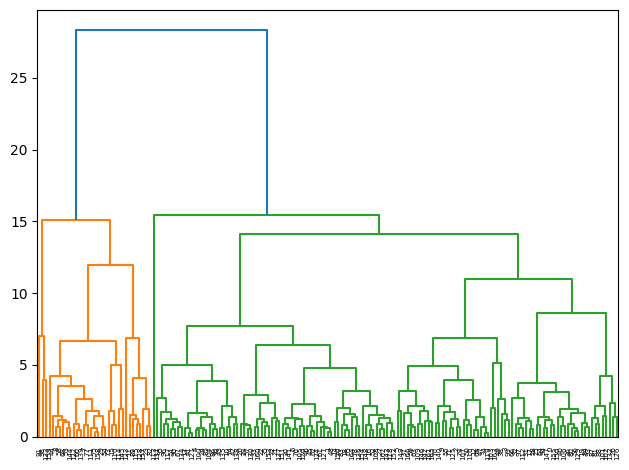

In [126]:
linkage_data = linkage(df_num_scaled, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

## K-Means for 5 clusters

The other elbow noticeable is the one around the 5 cluster point.

In [101]:
df_num1 = df_num.copy().drop(columns=['labels'])
df_num_scaled1 = transformer.fit_transform(df_num1)
km_model1 = KMeans(n_clusters=5, max_iter=300, random_state=1)
km_model1.fit(df_num_scaled1)

KMeans(n_clusters=5, random_state=1)

In [102]:
df_num1['labels'] = km_model1.labels_

In [103]:
centroids1 = km_model1.cluster_centers_
print('The centroids are:', centroids1)

The centroids are: [[ 5.43961146e-02  5.61875253e-01  4.74158872e-01  2.31641268e-01
  -1.02448804e-01  1.98524438e-01  1.88764863e-01  7.87316037e-01
   6.93236557e-02]
 [-2.59084942e-01 -1.55806510e-01  3.51836786e-01  3.11038820e+00
  -2.95494870e-01  1.83091124e+00  1.06439682e-01  9.48513909e-01
   8.68238776e-01]
 [ 8.92710562e-01 -3.18959415e-01 -2.75283937e-01 -1.23595160e-01
   7.22586973e-01 -1.79582695e-01  4.51515567e-01  6.45027585e-01
  -4.20623695e-01]
 [-2.81646549e-01  3.97081144e+00  5.11796733e+00  4.15932914e+00
  -3.26845638e-01  2.78083483e+00  3.62776025e-02  9.73044050e-01
  -8.16303241e-03]
 [ 2.05571031e+00 -9.07180385e-01 -3.52087114e-01 -1.83176101e-01
   1.10302013e+01 -2.47364361e-01  7.39747634e-01  5.60157791e-01
  -6.37438082e-01]]


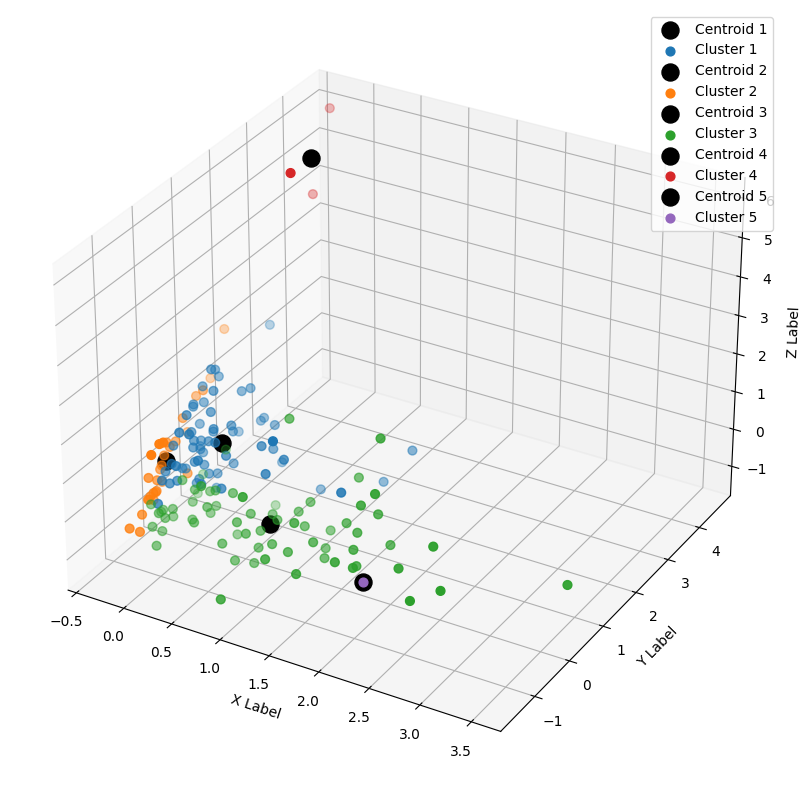

In [104]:
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.gca(projection='3d')

for cluster_label in range(5):
    cluster_indices = np.where(df_num1['labels'] == cluster_label)[0] 
    cluster_centroid = centroids1[cluster_label]
    ax1.scatter(cluster_centroid[0], cluster_centroid[1], cluster_centroid[2], c="black", s=150, label=f"Centroid {cluster_label + 1}")
    
    cluster_data = df_num_scaled1.iloc[cluster_indices] 
    ax1.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], label=f"Cluster {cluster_label + 1}", s=40)

ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')
ax1.legend()

In [108]:
df_with_labels1 = df_num_scaled1.copy()
df_with_labels1['Cluster'] = df_num1['labels'] 

fig = px.scatter_3d(
    df_with_labels1,
    x='robust_scaler__income',  
    y='standard_scaler__health',      
    z='robust_scaler__gdpp',     
    color='Cluster',
    title='Interactive 3D Scatter Plot'
)
fig.show()

Even only with the graph, we can notice that the clusters are all mixed up. None of it can be really distinguished. Which will be even more obvious with the silhouette score.

In [109]:
sil_score1 = silhouette_score(df_num1, km_model1.labels_)
sil_score1

-0.22162958382027312

Thus, we can see that the KMeans model works really well with the data given given 2 clusters. When set higher, the model cannot make sense and categorize the data well enough to differentiate the countries.

# Classification with XGBoost

In [ ]:
df['continent'] = LabelEncoder().fit_transform(df['continent'])
x = df.drop(columns=['continent'])
y = df['continent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.8, colsample_bytree=0.8, n_jobs=-1)
n_estimators_range = [10, 20, 50, 100]
kf = KFold(n_splits=5, shuffle=True, random_state=1)
results = {}
for n_estimators in n_estimators_range:
    xgb.n_estimators = n_estimators
    scores = cross_val_score(xgb, x, y, cv=kf, scoring='accuracy')
    mean_score = np.mean(scores)
    results[n_estimators] = mean_score
best_n_estimators = max(results, key=results.get)
for n_estimators, score in results.items():
    print(f"n_estimators = {n_estimators}: Accuracy = {score}")
print(f"Best n_estimators: {best_n_estimators}")

In [ ]:
bst = XGBClassifier(n_estimators = best_n_estimators, learning_rate=0.1, 
                    max_depth=3, subsample=0.8, colsample_bytree=0.8, n_jobs=-1)
bst.fit(x_train, y_train)

In [ ]:
predicts = bst.predict(x_test)
predicts

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, predicts)
precision = precision_score(y_test, predicts, average='weighted')
recall = recall_score(y_test, predicts, average='weighted')
f1 = f1_score(y_test, predicts, average='weighted')
conf_matrix = confusion_matrix(y_test, predicts)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
def plot_confusion_matrix(y,y_predict):

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4', '5']); ax.yaxis.set_ticklabels(['0', '1', '2', '3', '4', '5']) 
    plt.show() 

In [ ]:
param_grid = {
    'learning_rate': [0.1],
    'max_depth': [5],
    'subsample': [0.8],
    'min_child_weight': [5],
    'gamma': [0],
    'colsample_bytree': [0.6],
}
xgb_param = XGBClassifier(n_estimators= best_n_estimators, n_jobs=-1)
grid_search = GridSearchCV(xgb_param, param_grid, cv=5)

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

In [ ]:
yhat=grid_search.predict(x_test)
plot_confusion_matrix(y_test,yhat)

Succeeded in increasing the accuracy of the XGBoostClassifier to 0.68
However, it is hard to predict the continent of countries when there are so many different values in the same features among a unique cluster

We can see here that Jamaica were considered to be part of Asia, but it was probably because this country's characteristics were much lower than the average North-American country.\
Same thing for Solomon Islands, which were considered as part of Africa, when it is located in Oceania with Australia and New-Zealand.\
It is also difficult for the algorithm to detect correctly the continent based on those factors, even among the developed countries: Canada was considered as part of Europe. But since the US is so much more developed, the model considered the continent as far superior to Canada and ranged Canada in Europe.

In [ ]:
df_num['Trade_Balance'] = df_num['exports'] - df_num['imports']
df_num['Health_Spending_Per_Capita'] = df_num['health'] / (df_num['gdpp'] * df_num['life_expec'] / 100)
df_num.drop(columns=['labels'], inplace=True)

In [ ]:
new_df_scaled = pd.DataFrame(num_transformer_simplified.fit_transform(df_num), columns=df_num.columns)

In [ ]:
df_pca.set_index(df_num_scaled.index, inplace=True)

In [ ]:
pca_c_df = pd.concat([new_df_scaled, df_pca], axis=1)

In [ ]:
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(pca_c_df, y, test_size=0.2, random_state=42)

In [ ]:
pca_xgb = XGBClassifier(n_estimators = best_n_estimators,
                        colsample_bytree = 0.6, 
                        gamma = 0, 
                        learning_rate = 0.1, 
                        max_depth = 5, 
                        min_child_weight = 2, 
                        subsample = 0.8,
                       n_jobs=-1)
pca_xgb.fit(pca_x_train, pca_y_train)

In [ ]:
predictions = pca_xgb.predict(pca_x_test)
accuracy_pca = accuracy_score(pca_y_test, predictions)
precision_pca = precision_score(pca_y_test, predictions, average='weighted')
recall_pca = recall_score(pca_y_test, predictions, average='weighted')
f1_pca = f1_score(pca_y_test, predictions, average='weighted')
conf_matrix_pca = confusion_matrix(pca_y_test, predictions)

print(f"Accuracy: {accuracy_pca:.2f}")
print(f"Precision: {precision_pca:.2f}")
print(f"Recall: {recall_pca:.2f}")
print(f"F1-Score: {f1_pca:.2f}")
print("Confusion Matrix:")
print(conf_matrix_pca)

We can see that even after adding the PCA columns and doing some data engineering, the model stalls at a 0.68~0.69 accuracy score, indicating that predicting continents is a tough task when some countries are very different than others in the same one (US - St. Vincent and the Grenadines, China/Japan/Qatar - Philippines/Thailand, etc.)\
However, the model seems to be very accurate to correctly predict European countries. This can indicate that this continent is relatively the same across its countries, maybe a good indicator to how economical and health development should be organised.

In [ ]:
best_state={}
random_states = range(1,100)
for n in random_states:
    pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(pca_c_df, y, test_size=0.3, random_state=n)
    pca_xgb_st = XGBClassifier(n_estimators = best_n_estimators,
                            colsample_bytree = 0.6, 
                            gamma = 0, 
                            learning_rate = 0.1, 
                            max_depth = 5, 
                            min_child_weight = 2, 
                            subsample = 0.8,
                            n_jobs=-1)
    pca_xgb_st.fit(pca_x_train, pca_y_train)
    accuracy = accuracy_score(pca_y_test, pca_xgb_st.predict(pca_x_test))
    best_state[n] = accuracy
print('The best accuracy score is:', max(best_state.values()))
print('The best random_state parameter for best accuracy score is:', max(best_state, key=lambda k: best_state[k]))

In [ ]:
sum(best_state.values()) / len(best_state)

By augmenting the test_size and observing the actual variance in the accuracy score depending on the random_state chosen, and calculating the mean accuracy score out of 100 iterations. We can say that the actual accuracy is situated around 0.64. Asserting the difficulty to predict the continents count

# Regression with XGBoost